In [1]:
import pandas as pd
import calendar
# Load the BTS dataset (replace 'bts_flights.csv' with your downloaded file name)
flights_df = pd.read_csv('dataset_US_2024.csv')

# Preview the dataset to understand its structure
print(flights_df.columns)
print(flights_df.head())



Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')
   year  month carrier       carrier_name airport  \
0  2024      7      9E  Endeavor Air Inc.     ABE   
1  2024      7      9E  Endeavor Air Inc.     AEX   
2  2024      7      9E  Endeavor Air Inc.     AGS   
3  2024      7      9E  Endeavor Air Inc.     ALB   
4  2024      7      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         90.0       29.0   
1           Alexandria, LA: Alexandria International         85.0       22.0   
2        Augusta, GA: Augusta Regional at Bush Field        175.0       44.0 

In [2]:
# Load the CSV file into a pandas DataFrame
# Replace  with your actual file path
flights_df = pd.read_csv('dataset_US_2024.csv')

# Convert numeric month values to month names
flights_df['month'] = flights_df['month'].apply(lambda x: calendar.month_name[x])

# Now the 'Month' column in the DataFrame has month names instead of numbers
# save it back to CSV if needed
flights_df.to_csv('update_dataset_US_2024.csv', index=False)

# Display the updated DataFrame to ensure it worked
print(flights_df)

       year     month carrier        carrier_name airport  \
0      2024      July      9E   Endeavor Air Inc.     ABE   
1      2024      July      9E   Endeavor Air Inc.     AEX   
2      2024      July      9E   Endeavor Air Inc.     AGS   
3      2024      July      9E   Endeavor Air Inc.     ALB   
4      2024      July      9E   Endeavor Air Inc.     ATL   
...     ...       ...     ...                 ...     ...   
11270  2024  February      YV  Mesa Airlines Inc.     ECP   
11271  2024  February      YV  Mesa Airlines Inc.     ELP   
11272  2024  February      YV  Mesa Airlines Inc.     GJT   
11273  2024  February      YV  Mesa Airlines Inc.     GUC   
11274  2024  February      YV  Mesa Airlines Inc.     HRL   

                                            airport_name  arr_flights  \
0      Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         90.0   
1               Alexandria, LA: Alexandria International         85.0   
2            Augusta, GA: Augusta Regional at Bu

In [3]:
# List of U.S. airports with flights to/from Melbourne
us_airports = ['LAX', 'SFO', 'DFW', 'JFK']

# Filter the dataset for these U.S. airports
us_airports_flights = flights_df[flights_df['airport'].isin(us_airports)]

# Analyze the filtered data for U.S. airports
total_flights_us = us_airports_flights['arr_flights'].sum()
total_delayed_flights_us = us_airports_flights['arr_del15'].sum()
total_cancelled_flights_us = us_airports_flights['arr_cancelled'].sum()

# Summarize the causes of delays
carrier_delay_total_us = us_airports_flights['carrier_ct'].sum()
weather_delay_total_us = us_airports_flights['weather_ct'].sum()
nas_delay_total_us = us_airports_flights['nas_ct'].sum()
late_aircraft_delay_total_us = us_airports_flights['late_aircraft_ct'].sum()

# Compile the results into a summary
us_airports_flights_summary = {
    "Total Flights": total_flights_us,
    "Delayed Flights (15+ mins)": total_delayed_flights_us,
    "Cancelled Flights": total_cancelled_flights_us,
    "Carrier Delay Count": carrier_delay_total_us,
    "Weather Delay Count": weather_delay_total_us,
    "NAS Delay Count": nas_delay_total_us,
    "Late Aircraft Delay Count": late_aircraft_delay_total_us
}

us_airports_flights_summary


{'Total Flights': 382284.0,
 'Delayed Flights (15+ mins)': 102101.0,
 'Cancelled Flights': 6857.0,
 'Carrier Delay Count': 27171.260000000002,
 'Weather Delay Count': 4479.06,
 'NAS Delay Count': 35922.96,
 'Late Aircraft Delay Count': 34242.380000000005}

In [4]:
# Group the data by airport to get a breakdown of delays and cancellations by each airport
us_airport_grouped = us_airports_flights.groupby('airport').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_cancelled': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'late_aircraft_ct': 'sum'
}).reset_index()

# Rename columns for better readability
us_airport_grouped.columns = [
    'Airport',
    'Total Flights',
    'Delayed Flights (15+ mins)',
    'Cancelled Flights',
    'Carrier Delay Count',
    'Weather Delay Count',
    'NAS Delay Count',
    'Late Aircraft Delay Count'
]


us_airport_grouped.head()

,Airport,Total Flights,Delayed Flights (15+ mins),Cancelled Flights,Carrier Delay Count,Weather Delay Count,NAS Delay Count,Late Aircraft Delay Count
0,DFW,158112.0,42407.0,3934.0,10294.37,2785.30,11569.27,17625.29
1,JFK,61513.0,14068.0,1209.0,4328.58,416.70,4770.86,4524.40
2,LAX,97396.0,21689.0,851.0,7819.00,748.40,5850.50,7176.82
3,SFO,65263.0,23937.0,863.0,4729.31,528.66,13732.33,4915.87


In [5]:
# Group the data by month and airport to compare delays and cancellations across months
monthly_airport_delays = us_airports_flights.groupby(['month', 'airport']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_cancelled': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'late_aircraft_ct': 'sum'
}).reset_index()

# Rename columns for better readability
monthly_airport_delays.columns = [
    'Month',
    'Airport',
    'Total Flights',
    'Delayed Flights (15+ mins)',
    'Cancelled Flights',
    'Carrier Delay Count',
    'Weather Delay Count',
    'NAS Delay Count',
    'Late Aircraft Delay Count'
]

monthly_airport_delays.head()

# Save the DataFrame to a CSV file
monthly_airport_delays.to_csv('monthly_airport_delays.csv', index=False)

# Print a message confirming the file has been saved
print("CSV file 'monthly_airport_delays.csv' created successfully.")

CSV file 'monthly_airport_delays.csv' created successfully.


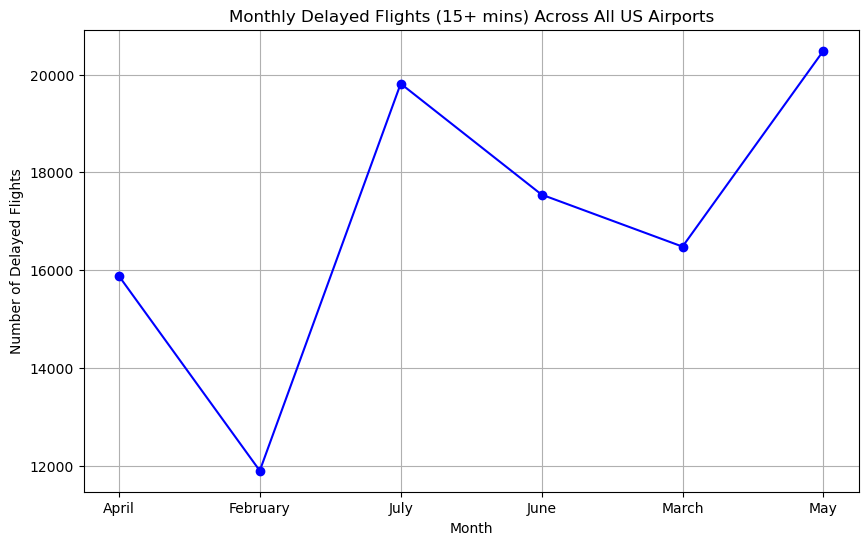

In [15]:
import matplotlib.pyplot as plt

# Plot the monthly delay trends for all airports combined
plt.figure(figsize=(10, 6))

# Group the data by month and sum up the delayed flights for each month
monthly_delays = monthly_airport_delays.groupby('Month')['Delayed Flights (15+ mins)'].sum()

# Plot the delays by month
plt.plot(monthly_delays.index, monthly_delays.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Delayed Flights (15+ mins) Across All US Airports')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.xticks(monthly_delays.index)
plt.grid(True)

# Show the plot
plt.show()


Index(['Month', 'Airport', 'Total Flights', 'Delayed Flights (15+ mins)',
       'Cancelled Flights', 'Carrier Delay Count', 'Weather Delay Count',
       'NAS Delay Count', 'Late Aircraft Delay Count'],
      dtype='object')


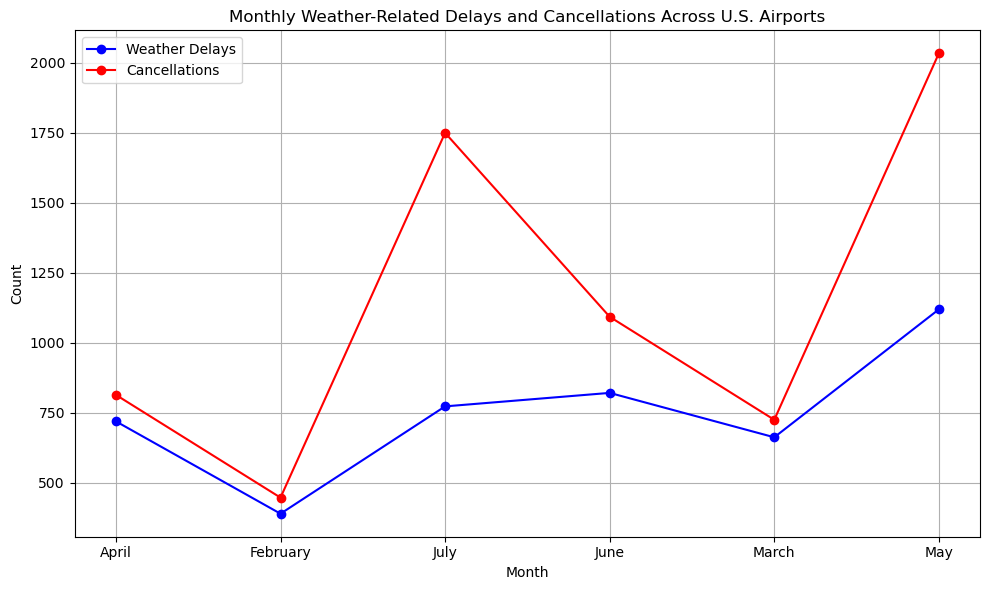

In [16]:
# Group the data by month and calculate total weather delays and cancellations
# Verify the exact column names first
print(monthly_airport_delays.columns)

# aggregation
weather_trends = monthly_airport_delays.groupby('Month').agg({
    'Weather Delay Count': 'sum',
    'Cancelled Flights': 'sum',
    'Total Flights': 'sum'
}).reset_index()

# Plot weather-related delays and cancellations over months
plt.figure(figsize=(10, 6))

# Plot weather-related delays
plt.plot(weather_trends['Month'], weather_trends['Weather Delay Count'], marker='o', linestyle='-', label='Weather Delays', color='b')

# Plot cancellations
plt.plot(weather_trends['Month'], weather_trends['Cancelled Flights'], marker='o', linestyle='-', label='Cancellations', color='r')

# Add title and labels
plt.title('Monthly Weather-Related Delays and Cancellations Across U.S. Airports')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(weather_trends['Month'])
plt.grid(True)

# Add a legend
plt.legend()

#save file
output_path = 'output/monthly_weather_related_delays.png'
plt.savefig(output_path)

# Show the plot
plt.tight_layout()
plt.show()


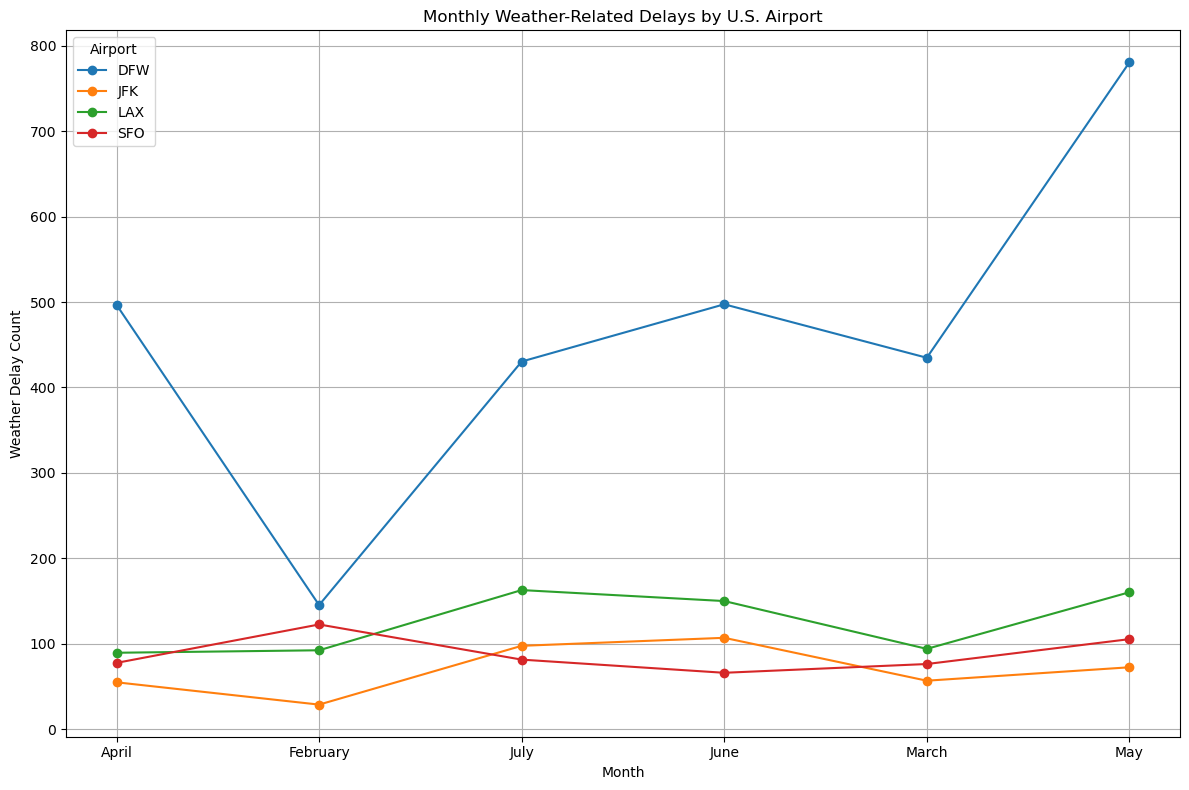

In [19]:
# group the data by both 'Month' and 'Airport' to break down weather delays by airport
weather_delays_by_airport = monthly_airport_delays.groupby(['Month', 'Airport']).agg({
    'Weather Delay Count': 'sum'
}).reset_index()

# plot the weather delays by airport and month
plt.figure(figsize=(12, 8))

# Plot weather-related delays for each airport
for airport in weather_delays_by_airport['Airport'].unique():
    airport_data = weather_delays_by_airport[weather_delays_by_airport['Airport'] == airport]
    plt.plot(airport_data['Month'], airport_data['Weather Delay Count'], marker='o', linestyle='-', label=airport)

# Add title and labels
plt.title('Monthly Weather-Related Delays by U.S. Airport')
plt.xlabel('Month')
plt.ylabel('Weather Delay Count')
plt.xticks(weather_delays_by_airport['Month'].unique())
plt.grid(True)

# Add a legend to distinguish between airports
plt.legend(title='Airport')

#save file
output_path = 'output/monthly_weather_related_delays_US_airports.png'
plt.savefig(output_path)

# Show the plot
plt.tight_layout()
plt.show()


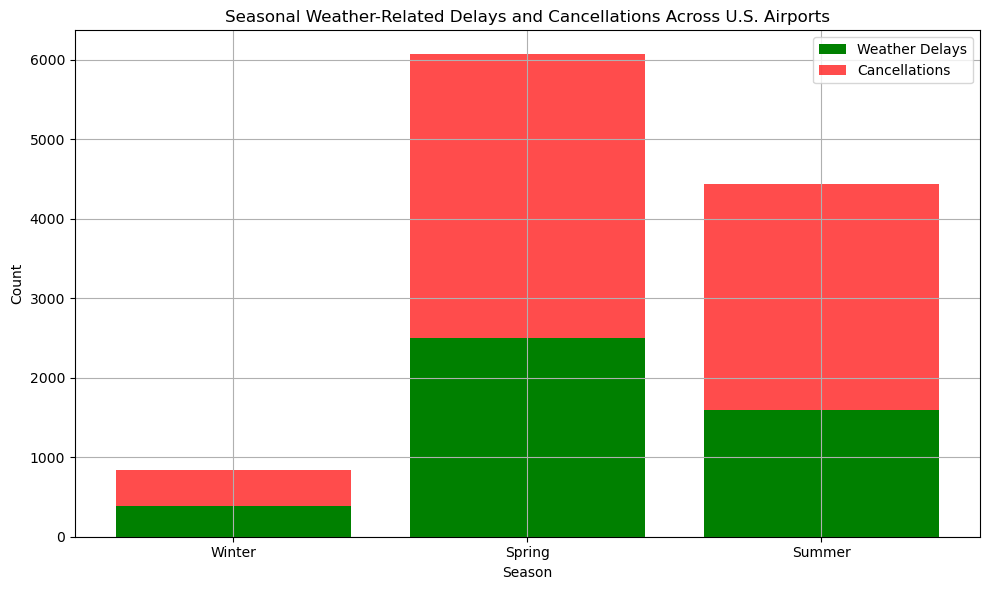

In [26]:
# Define a function to map month names to seasons
def month_to_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'

# Apply the function to create a 'Season' column in the dataset
monthly_airport_delays['Season'] = monthly_airport_delays['Month'].apply(month_to_season)

# Group the data by 'Season' and calculate the total delays and cancellations by season
seasonal_delays = monthly_airport_delays.groupby('Season').agg({
    'Weather Delay Count': 'sum',
    'Cancelled Flights': 'sum',
    'Total Flights': 'sum'
}).reset_index()

# Sort the seasons in the order: Winter, Spring, Summer, Fall
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_delays['Season'] = pd.Categorical(seasonal_delays['Season'], categories=season_order, ordered=True)
seasonal_delays = seasonal_delays.sort_values('Season')

# Plot seasonal weather delays and cancellations
plt.figure(figsize=(10, 6))

# Plot weather-related delays by season
plt.bar(seasonal_delays['Season'], seasonal_delays['Weather Delay Count'], label='Weather Delays', color='g')

# Plot cancellations by season on top of weather delays (top of stacked bar)
plt.bar(seasonal_delays['Season'], seasonal_delays['Cancelled Flights'], bottom=seasonal_delays['Weather Delay Count'], 
        label='Cancellations', color='r', alpha=0.7)

# Add labels and title
plt.title('Seasonal Weather-Related Delays and Cancellations Across U.S. Airports')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(True)

# Add legend
plt.legend()

#save file
output_path = 'output/seasonal_weather_related_delays_US_airports_2024.png'
plt.savefig(output_path)
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
from scipy import stats
import numpy as np

# Prepare data for t-test: comparing weather-related delays vs. non-weather-related delays
weather_delays = monthly_airport_delays['Weather Delay Count']
non_weather_delays = monthly_airport_delays['Carrier Delay Count'] + monthly_airport_delays['NAS Delay Count'] + monthly_airport_delays['Late Aircraft Delay Count']

# Perform t-test between weather-related delays and non-weather-related delays
t_stat, p_value = stats.ttest_ind(weather_delays, non_weather_delays, equal_var=False, nan_policy='omit')

# Prepare data for chi-square test: cancellations caused by weather vs. non-weather
weather_cancellations = monthly_airport_delays['Cancelled Flights']
total_flights = monthly_airport_delays['Total Flights']
non_weather_cancellations = total_flights - weather_cancellations

# Perform chi-square test on cancellations
chi2_stat, p_val_chi2, dof, expected = stats.chi2_contingency([weather_cancellations, non_weather_cancellations])

# Summary of hypothesis test results
hypothesis_results = {
    'T-test': {
        'T-statistic': t_stat,
        'P-value': p_value
    },
    'Chi-square Test': {
        'Chi2-statistic': chi2_stat,
        'P-value': p_val_chi2,
        'Degrees of Freedom': dof
    }
}

hypothesis_results


{'T-test': {'T-statistic': -9.796147537291292,
  'P-value': 9.246143789201444e-10},
 'Chi-square Test': {'Chi2-statistic': 5318.156086686263,
  'P-value': 0.0,
  'Degrees of Freedom': 23}}